In [1]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset

/tmp/ipykernel_2988/2120876513.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
# create data

nPerClust = 75

th = np.linspace(0,4*np.pi,nPerClust)
r1 = 10
r2 = 15

# generate data
a = [ r1*np.cos(th) + np.random.randn(nPerClust)*3 ,
      r1*np.sin(th) + np.random.randn(nPerClust) ]
b = [ r2*np.cos(th) + np.random.randn(nPerClust) ,
      r2*np.sin(th) + np.random.randn(nPerClust)*3 ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

In [3]:
data = torch.tensor([[ 1.0172e+01, -7.9788e-01],
        [ 7.8981e+00,  9.3607e-01],
        [ 9.4174e+00,  3.1220e+00],
        [ 2.6646e+00,  5.9819e+00],
        [ 1.0006e+01,  4.7549e+00],
        [ 8.2393e+00,  6.6634e+00],
        [ 2.5807e+00,  9.9903e+00],
        [ 1.0097e+01,  9.2281e+00],
        [ 3.5558e+00,  9.6610e+00],
        [-4.3114e-01,  8.1730e+00],
        [-2.2222e+00,  8.7570e+00],
        [ 1.0412e+00,  1.0106e+01],
        [-3.8713e+00,  9.8365e+00],
        [-7.4575e+00,  8.1438e+00],
        [-4.9681e+00,  6.1742e+00],
        [-4.6311e+00,  3.0771e+00],
        [-8.4369e+00,  4.1159e+00],
        [-9.1596e+00,  3.6197e+00],
        [-8.7724e+00,  3.9337e-01],
        [-1.0796e+01, -3.0584e+00],
        [-1.0282e+01, -3.2442e+00],
        [-7.9629e+00, -3.6032e+00],
        [-8.4018e+00, -5.5507e+00],
        [-3.6718e+00, -6.5719e+00],
        [-1.0354e+01, -7.4682e+00],
        [-1.8315e+00, -9.4919e+00],
        [-4.2573e+00, -9.3266e+00],
        [-3.8302e-01, -9.2698e+00],
        [ 1.1976e-02, -9.6077e+00],
        [-7.5183e-01, -8.6731e+00],
        [ 8.2167e-01, -1.0688e+01],
        [ 5.4129e+00, -7.3720e+00],
        [ 6.9006e+00, -8.7815e+00],
        [ 8.6377e+00, -6.7181e+00],
        [ 6.5724e+00, -4.0233e+00],
        [ 1.0984e+01, -3.0427e+00],
        [ 1.4314e+01,  2.0810e-01],
        [ 6.8482e+00, -1.0142e+00],
        [ 6.2086e+00,  1.6045e+00],
        [ 6.9081e+00,  4.5799e+00],
        [ 6.2353e+00,  5.4795e+00],
        [ 1.0258e+01,  7.4759e+00],
        [ 5.6436e+00,  8.9746e+00],
        [ 6.0020e+00,  9.0119e+00],
        [ 3.3563e+00,  1.0009e+01],
        [-8.6429e-01,  9.6787e+00],
        [ 5.0715e+00,  9.0854e+00],
        [ 2.5393e+00,  1.0592e+01],
        [ 2.4440e+00,  9.1244e+00],
        [-6.2037e+00,  1.0785e+01],
        [-5.6938e+00,  7.0386e+00],
        [-1.2767e+01,  7.0521e+00],
        [-8.1617e+00,  6.5515e+00],
        [-4.0561e+00,  5.0544e+00],
        [-1.1854e+01,  3.0950e+00],
        [-1.0687e+01,  2.0124e+00],
        [-9.7305e+00, -9.9134e-01],
        [-4.9153e+00, -4.1639e+00],
        [-1.0765e+01, -2.4494e+00],
        [-6.9761e-01, -5.3167e+00],
        [-6.4447e+00, -7.1072e+00],
        [-3.5215e+00, -7.6817e+00],
        [ 1.9674e-02, -8.3113e+00],
        [-9.0444e-01, -8.5869e+00],
        [-2.5158e+00, -8.4141e+00],
        [-1.1720e+00, -7.9251e+00],
        [ 2.0575e+00, -1.1307e+01],
        [ 3.6461e+00, -9.3353e+00],
        [ 6.7279e+00, -7.6654e+00],
        [ 3.2176e+00, -5.5135e+00],
        [ 1.1042e+01, -5.6386e+00],
        [ 7.8202e+00, -3.7658e+00],
        [ 1.4336e+01, -1.9612e+00],
        [ 7.2453e+00, -2.4607e+00],
        [ 9.3939e+00,  9.4974e-02],
        [ 1.5870e+01, -1.2381e-01],
        [ 1.4079e+01, -1.7890e-01],
        [ 1.3260e+01,  7.8844e+00],
        [ 1.3486e+01,  8.8606e+00],
        [ 1.2409e+01,  9.6412e+00],
        [ 9.4248e+00,  1.5271e+01],
        [ 7.8594e+00,  1.4257e+01],
        [ 5.7650e+00,  1.2301e+01],
        [ 2.1581e+00,  1.5934e+01],
        [ 2.8853e+00,  1.3583e+01],
        [-1.8414e+00,  1.2844e+01],
        [-5.7178e+00,  1.8437e+01],
        [-8.3677e+00,  9.6759e+00],
        [-9.9547e+00,  1.3470e+01],
        [-9.8145e+00,  9.0208e+00],
        [-1.1502e+01,  8.6088e+00],
        [-1.3432e+01,  7.1873e+00],
        [-1.6285e+01,  3.7495e+00],
        [-1.4250e+01,  8.4297e+00],
        [-1.5573e+01, -7.9192e-02],
        [-1.1970e+01, -1.8171e+00],
        [-1.5028e+01, -1.2362e+01],
        [-1.3141e+01, -7.1406e+00],
        [-9.8368e+00, -5.0295e+00],
        [-8.6025e+00, -1.4519e+01],
        [-5.9734e+00, -8.1074e+00],
        [-3.9344e+00, -1.1407e+01],
        [-1.9953e+00, -1.5285e+01],
        [ 1.5423e+00, -1.6474e+01],
        [ 1.6030e+00, -1.7970e+01],
        [ 4.6529e+00, -1.3188e+01],
        [ 7.6763e+00, -1.7641e+01],
        [ 9.4449e+00, -1.8130e+01],
        [ 1.3369e+01, -9.8741e+00],
        [ 1.1559e+01, -6.0726e+00],
        [ 1.5373e+01, -6.0427e+00],
        [ 1.4584e+01, -1.8746e+00],
        [ 1.4377e+01,  3.2912e+00],
        [ 1.4209e+01, -4.0850e+00],
        [ 1.4763e+01,  6.1281e-01],
        [ 1.5023e+01,  4.8942e+00],
        [ 1.2369e+01,  1.2397e+01],
        [ 1.0720e+01,  6.3008e+00],
        [ 7.2347e+00,  1.0268e+01],
        [ 5.6541e+00,  1.6197e+01],
        [ 1.8024e+00,  1.3299e+01],
        [-1.2668e+00,  1.4097e+01],
        [-3.7264e+00,  1.5163e+01],
        [-5.0738e+00,  8.4331e+00],
        [-8.0152e+00,  1.6116e+01],
        [-1.1388e+01,  1.1108e+01],
        [-1.0095e+01,  8.9915e+00],
        [-1.2404e+01,  9.6339e+00],
        [-1.3190e+01,  6.9729e+00],
        [-1.4566e+01,  1.0057e+01],
        [-1.5276e+01,  3.5595e+00],
        [-1.4815e+01,  2.0336e+00],
        [-1.4204e+01, -3.9623e+00],
        [-1.3177e+01, -1.2061e+01],
        [-1.1142e+01, -1.0343e+01],
        [-1.0790e+01, -8.9482e+00],
        [-1.0424e+01, -1.3984e+01],
        [-7.1116e+00, -1.3940e+01],
        [-3.9284e+00, -1.2849e+01],
        [-1.7479e+00, -1.3574e+01],
        [ 1.4725e+00, -1.2542e+01],
        [ 2.5899e+00, -1.0896e+01],
        [ 5.0626e+00, -1.4246e+01],
        [ 6.9487e+00, -1.2757e+01],
        [ 8.6518e+00, -1.2980e+01],
        [ 1.0697e+01, -8.4937e+00],
        [ 1.2938e+01, -1.3919e+01],
        [ 1.4198e+01, -5.0566e+00],
        [ 1.3957e+01,  1.8582e-01],
        [ 1.5250e+01, -6.0532e-01]])

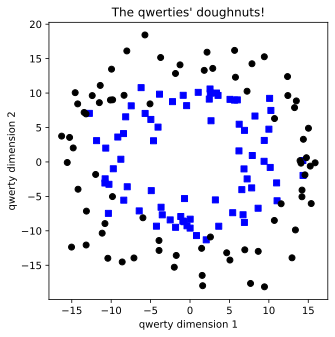

In [4]:
# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title("The qwerties' doughnuts!")
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [5]:
from torch import dropout


class Classifier2dModel(nn.Module):
    def __init__(self, _in, _out, depth=1, _params=None, dropout=False, dropoutRate=.5):
        super().__init__()
        self.dropout = dropout
        self.dr = dropoutRate
        self.layers = nn.ModuleList(
            [nn.Linear(_in, _out)] if depth == 1 else [nn.Linear(_in, _params)] +
            [nn.Linear(_params, _params)]*(depth-2) +
            [nn.Linear(_params, _out)]
        )

    def forward(self, x):
        for layer in self.layers[:-1]:
            x = F.relu(layer(x))
            if self.dropout:
                x = F.dropout(x, p=self.dr,training=self.training)
        return self.layers[-1](x)

In [6]:
class Classifier2d():
    def __init__(
        self, 
        data,labels, 
        out=1,
        lr=.01,  numepochs=500, depth=1, _params=None, train_size=.8, batch_size=1, 
        dropout=False, dropoutRate=.5):
        # model architecture
        self.lr = lr
        self.numepochs = numepochs
        self.model = Classifier2dModel(data.shape[1], out, depth, _params, dropout, dropoutRate)
        # loss and labeling function
        if out == 1:
            self.lossfun = nn.BCEWithLogitsLoss() 
            self.labelfun = lambda preds: preds > 0
            # self.lossfun = nn.BCELoss() 
            # self.labelfun = lambda preds: preds > .5
            
        else:
            self.lossfun = nn.CrossEntropyLoss()
            self.labelfun = lambda preds: torch.argmax(preds, axis=1)
        # optimizer
        self.optimizer = torch.optim.SGD(self.model.parameters(), lr=.01)
        self.trainaccs = torch.zeros(numepochs)
        self.testaccs = torch.zeros(numepochs)

        trainData, testData, trainLabels, testLabels = train_test_split(
            data, labels, train_size=train_size)

        trainData = TensorDataset(torch.tensor(
            trainData), torch.tensor(trainLabels))
        testData = TensorDataset(torch.tensor(
            testData), torch.tensor(testLabels))

        self.numOfBatches = len(trainLabels) // batch_size
        self.trainLoader = DataLoader(trainData, batch_size=batch_size)
        self.testLoader = DataLoader(testData, batch_size=len(testLabels))

    def train(self):
        # initialize losses
        self.losses = torch.zeros(self.numepochs)
        for epochi in range(self.numepochs):
            batchacc = torch.zeros(self.numOfBatches)
            batchloss = torch.zeros(self.numOfBatches)
            batchIter = 0
            self.model.train()
            for X, y in self.trainLoader:
                # forward pass
                yHat = self.model(X)

                # compute loss
                loss = self.lossfun(yHat, y)
                batchloss[batchIter] = loss

                # backprop
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()
                batchacc[batchIter] = self.getAcc(yHat, y)
                batchIter += 1

            self.losses[epochi] = torch.mean(batchloss)
            # compute accuracy
            self.trainaccs[epochi] = torch.mean(batchacc)

            X, y = next(iter(self.testLoader))
            self.testaccs[epochi] = self.eval(X, y)
        return self.trainaccs, self.testaccs, self.losses

    def split(self, data, labels, partitions):
        """ partitions: order is train,devset,test. It can be either a list of 2 or 3 elements """
        # split the data (note the third input, and the TMP in the variable name)
        train_data, testTMP_data, train_labels, testTMP_labels = train_test_split(data, labels, train_size=partitions[0])

        # now split the TMP data
        split = partitions[1] / (1-partitions[0])
        devset_data, test_data, devset_labels, test_labels = train_test_split(testTMP_data, testTMP_labels, train_size=split)
        return train_data, devset_data, test_data, train_labels, devset_labels, test_labels

    def getAcc(self, preds, labels):
        return 100*torch.mean((self.labelfun(preds) == labels).float())

    def eval(self, data, labels):
        self.model.eval()
        with torch.inference_mode():
            # final forward pass
            self.predictions = self.model(data)
            self.totalacc = self.getAcc(self.predictions, labels)
            return self.totalacc

    def print(self):
        for name, param in self.model.named_parameters():
            print(name, param.shape)

    def load(self, path):
        self.model.load_state_dict(torch.load(path))

    def save(self, path):
        torch.save(self.model.state_dict(), path)

In [7]:
from types import NoneType


def factorsList(N):
    arr = torch.arange(1,N+1)
    return arr[N % arr == 0]

def analyze(*args, **kwargs):
    numepochs = kwargs["numepochs"] if "numepochs" in kwargs.keys() else 500
    k = None
    v = None
    for _k,_v in kwargs.items():
        if type(_v) not in [int,float,NoneType]:
            k = _k
            v = _v
    if k==None or v ==None:
        raise Exception("k or v is None")
    trainaccs = torch.zeros(len(v), numepochs)
    testaccs = torch.zeros(len(v), numepochs)
    losses = torch.zeros(len(v), numepochs)

    for j, _v in enumerate(v):
        if type(_v) == torch.Tensor:
            _v = _v.item()
        kwargs[k] = _v
        classifier = Classifier2d(*args, **kwargs)
        trainaccs[j, :], testaccs[j, :], losses[j, :] = classifier.train()
    return trainaccs, testaccs, losses, k, v
def test(*args, **kwargs):
    times = kwargs["times"]
    del kwargs["times"]
    trainaccs = torch.zeros(times)
    testaccs  = torch.zeros(times)
    losses = torch.zeros(times)
    for t in range(times):
        classifier = Classifier2d(*args, **kwargs)
        trainaccstmp, testaccstmp, lossestmp = classifier.train()
        trainaccs[t] = trainaccstmp[-1]
        testaccs[t] = testaccstmp[-1]
        losses[t] = lossestmp[-1]
    trainaccavg = torch.mean(trainaccs)
    testaccavg = torch.mean(testaccs)
    lossavg = torch.mean(losses)
    print(f"trainacc: {trainaccavg}, testacc: {testaccavg}, loss: {lossavg}")

In [8]:
def plot2d(trainaccs, testaccs, v):
    numepochs = trainaccs.shape[1]
    fig, ax = plt.subplots(1, 2, figsize=(13, 5))

    ax[0].imshow(trainaccs, aspect='auto', origin="lower",
                 vmin=50, vmax=90, extent=[0, numepochs, v[0], v[-1]])
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Batch size')
    ax[0].set_title('Training accuracy')

    p = ax[1].imshow(testaccs, aspect='auto', origin="lower",
                     vmin=50, vmax=90, extent=[0, numepochs, v[0], v[-1]])
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Batch size')
    ax[1].set_title('Test accuracy')
    fig.colorbar(p, ax=ax[1])

    plt.show()
def plot(losses, v):
    plt.plot(losses.T.detach())
    plt.legend(v)
    plt.show()

In [9]:
def getmax(accs):
    amax = int(accs.argmax())
    x = amax % accs.shape[1]
    y = amax // accs.shape[1]
    return y, x

In [10]:
test(data,labels, times = 10, depth=4, _params=30, train_size=.85, lr=1.6667, dropout=False, dropoutRate=.2222)

/tmp/ipykernel_2988/2359277550.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  trainData = TensorDataset(torch.tensor(
/tmp/ipykernel_2988/2359277550.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  trainData), torch.tensor(trainLabels))
/tmp/ipykernel_2988/2359277550.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  testData = TensorDataset(torch.tensor(
/tmp/ipykernel_2988/2359277550.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().re

trainacc: 87.95275115966797, testacc: 83.04347229003906, loss: 0.25914835929870605


In [11]:
test(data,labels, times = 10, depth=4, _params=30, train_size=.85, lr=1.6667, dropout=False, dropoutRate=.6667)

/tmp/ipykernel_2988/2359277550.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  trainData = TensorDataset(torch.tensor(
/tmp/ipykernel_2988/2359277550.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  trainData), torch.tensor(trainLabels))
/tmp/ipykernel_2988/2359277550.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  testData = TensorDataset(torch.tensor(
/tmp/ipykernel_2988/2359277550.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().re

trainacc: 87.95275115966797, testacc: 83.47825622558594, loss: 0.24974694848060608


In [12]:
test(data,labels, times = 10, depth=4, _params=30, train_size=.85, lr=1.6667)

/tmp/ipykernel_2988/2359277550.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  trainData = TensorDataset(torch.tensor(
/tmp/ipykernel_2988/2359277550.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  trainData), torch.tensor(trainLabels))
/tmp/ipykernel_2988/2359277550.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  testData = TensorDataset(torch.tensor(
/tmp/ipykernel_2988/2359277550.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().re

trainacc: 88.5039291381836, testacc: 86.52174377441406, loss: 0.24534878134727478


In [ ]:
trainaccs, testaccs, losses, k, v = analyze(data,labels, depth=4, _params=30, train_size=.85, lr=1.6667, dropout=False, dropoutRate=torch.linspace(0,1,10))

In [ ]:
plot(losses, v)

In [ ]:
plot(trainaccs, v)

In [ ]:
plot(testaccs, v)

In [ ]:
plot2d(trainaccs, testaccs, v)